In [2]:
from lxml import html
import requests

wikipedia_page = 'https://en.wikipedia.org/wiki/List_of_Roman_hoards_in_Great_Britain'

hoards_tree = html.fromstring(requests.get(wikipedia_page).content)

## Ćwiczenie 1: Policz, ile jest wierszy w tabelkach
na stronie https://en.wikipedia.org/wiki/List_of_Roman_hoards_in_Great_Britain

In [4]:
len(hoards_tree.xpath('.//tr'))

131

## Ćwiczenie 2: Policz, ile Rzymskich skarbów zostało znalezionych w Wielkiej Brytanii
i powiedz czemu to inne ćwiczenie niż 1.

In [12]:
hoards = hoards_tree.xpath('.//table[contains(@class, "wikitable")]//tr[.//td]')
len(hoards)

116

## Ćwiczenie 3: Policz, ile spośród skarbów jest przechowywanych w Londynie

In [20]:
cnt = 0
for h in hoards:
    current_location = ''.join(h.xpath('.//td')[5].xpath('.//text()'))
    if 'London' in current_location:
        #print(current_location)
        #print(repr(current_location))
        cnt += 1
cnt

32

## Ćwiczenie 4: Zbuduj słownik: nazwa miejsca przechowywania skarbu (klucz) na liczbę skarbów przechowywanych w tym miejscu (wartość)

In [40]:
import re

def do_cleanup(location):
    location = re.sub(r'\[.*\]', '', location)
    location = re.sub(r'\(.*\)', '', location)
    location = re.sub(r'\d* coins at ', '', location)
    return location

cnt = 0
locations = {}
for h in hoards:
    current_location = ''.join(h.xpath('.//td')[5].xpath('.//text()'))
    for loc in current_location.split(' and '):
        for true_loc in loc.strip().split('\n'):
            if len(true_loc) == 0:
                continue
            true_loc = do_cleanup(true_loc)
            if true_loc not in locations:
                locations[true_loc] = 1
            else:
                locations[true_loc] += 1

# print(len(locations.keys()))
# for k in locations.keys():
#     print(k)

## Ćwiczenie 5: Zrób wykres słupkowy w oparciu o słownik z ćwiczenia 4

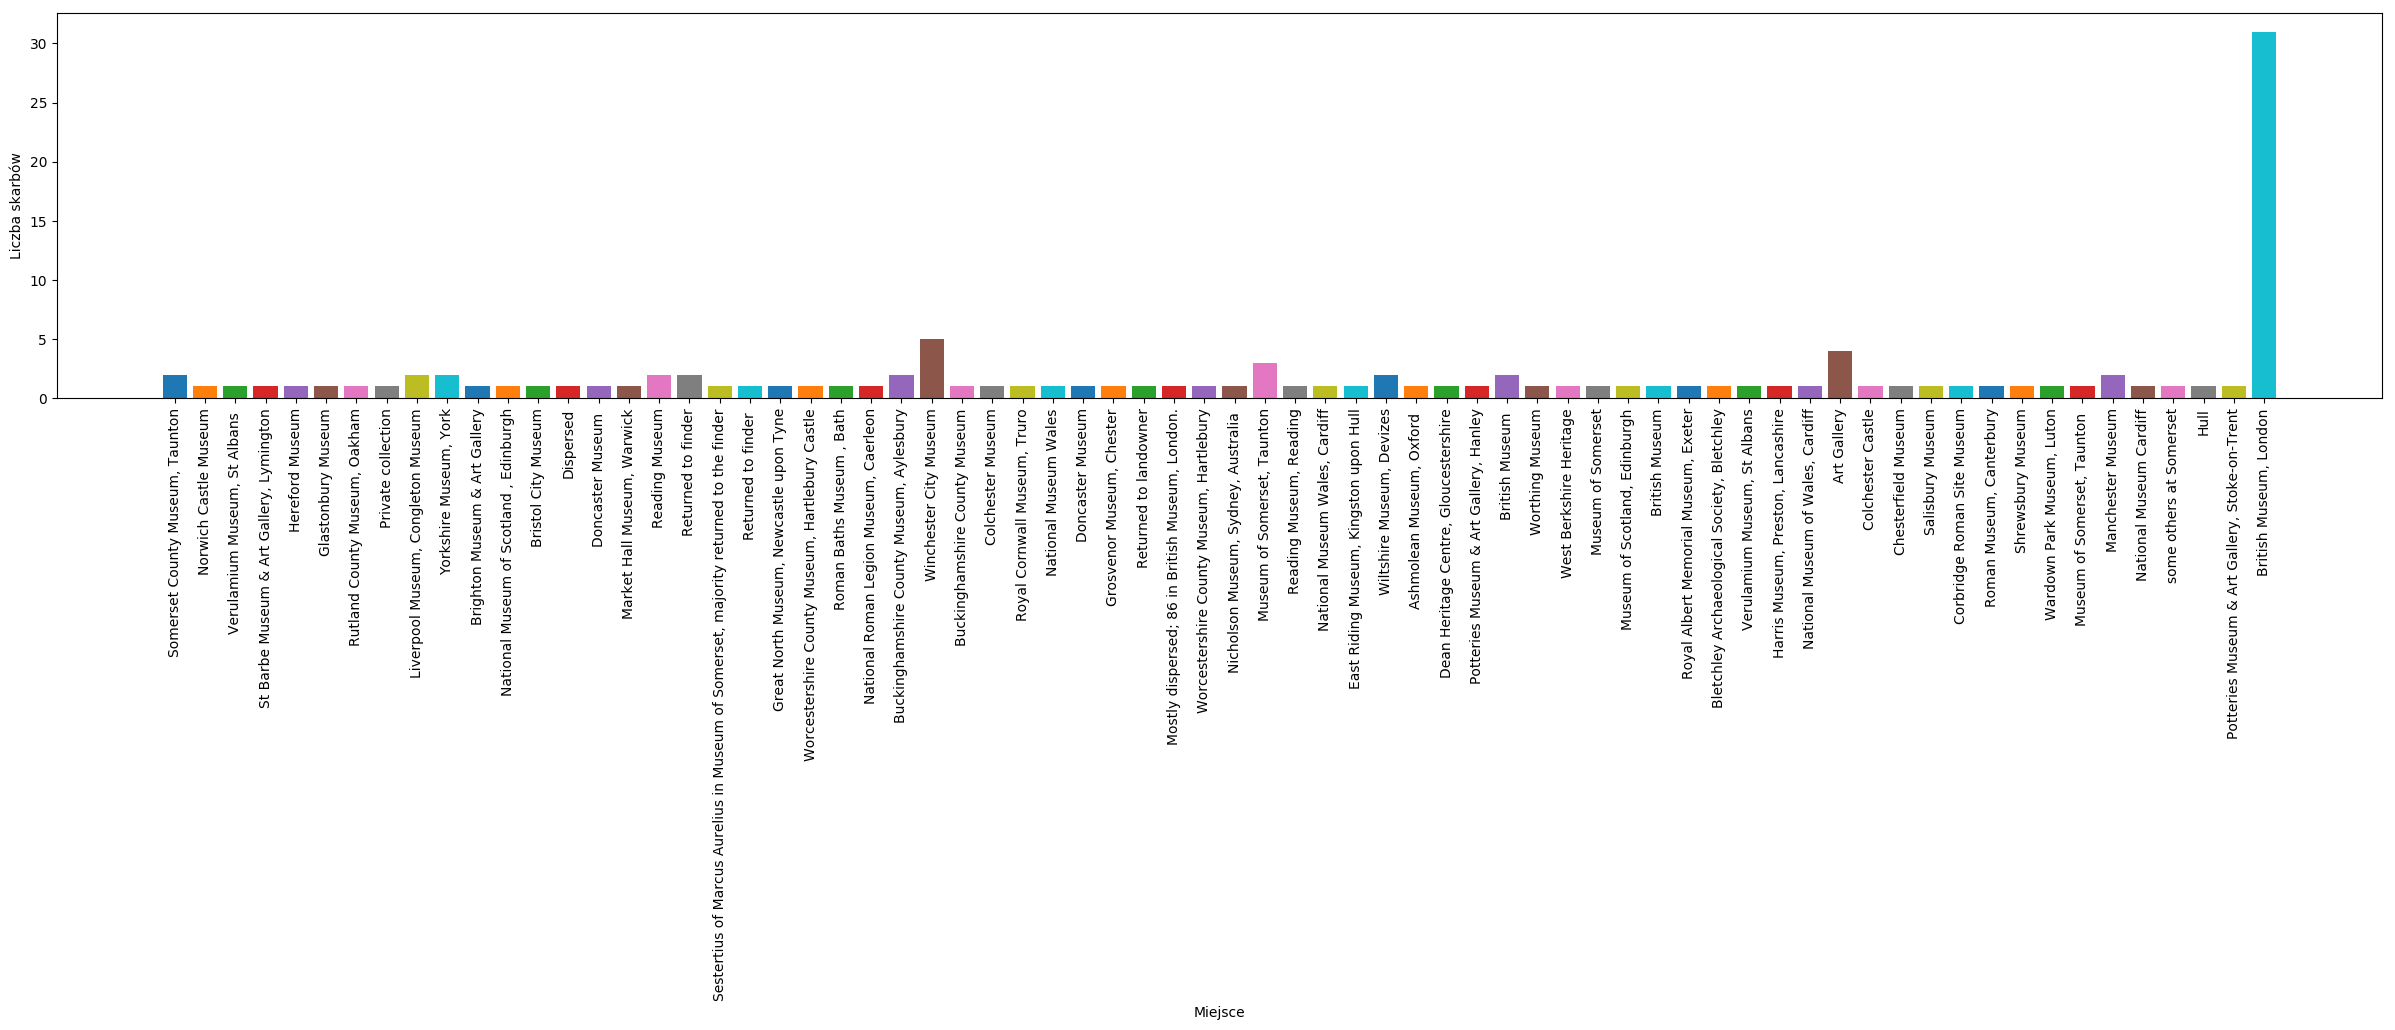

In [71]:
import matplotlib
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (30,5)

items = locations.items()

for idx, value in enumerate(value for key, value in items):
    plt.bar(idx, value, 0.8)

plt.xticks(range(len(locations)), (key for key, value in items), rotation=90)
plt.xlabel("Miejsce")
plt.ylabel("Liczba skarbów")

plt.show()

## Ćwiczenie 6: Zrób wykres słupkowy z ćwiczenia 5 w plotly

In [75]:
import plotly.offline as py
import plotly.graph_objs as go

items = locations.items()

bars = []
for place, count in items:
    bars.append(go.Bar(
        x=[place],
        y=[count],
        width=0.5,
        opacity=0.7,
        name=place,
    ))

layout = go.Layout(showlegend=False)

fig = go.Figure(data=bars, layout=layout)
py.init_notebook_mode(connected=True)
py.iplot(fig)

## Ćwiczenie 7: Utwórz listę nazw skarbów, lat ich odkrycia i współrzędnych geograficznych odkrycia
Weź pod uwagę tylko te skarby, dla których Wikipedia zna te współrzędne.

In [77]:
interesting_hoards = []
for h in hoards:
    location_found = ''.join(h.xpath('.//td')[3].xpath('.//span[@class="geo"]//text()'))
    if not location_found:
        continue
    name = ''.join(h.xpath('.//td')[0].xpath('.//text()'))
    year_of_discovery = ''.join(h.xpath('.//td')[4].xpath('.//text()'))
    interesting_hoards.append((name, year_of_discovery, location_found))
    
interesting_hoards

[('Agden Hoard', '1957', '53.381; -2.420'),
 ('Aldbury Hoard', '1870', '51.808; -0.594'),
 ('Alton Barnes Hoard', '2005', '51.359; -1.846'),
 ('Backworth Hoard', '1811', '55.037; -1.524'),
 ('Baldock Hoard', '2002', '51.990; -0.189'),
 ('Barkway Hoard', '1743', '52.004; 0.001'),
 ('Beau Street Hoard', '2008', '51.3804; -2.3604'),
 ('Beckfoot Hoard', '2010', '54.820; -3.410'),
 ('Beech Bottom Dyke Hoard', '1932', '51.769; -0.326'),
 ('Bishopswood Hoard', '1895', '51.870; -2.585'),
 ('Boldre Hoard', '2014', '50.7821; -1.5533'),
 ('Boothstown Hoard', '1947', '53.502; -2.420'),
 ('Braithwell Hoard', '2002', '53.444; -1.203'),
 ('Breamore hoards', '1998 (B)', '50.96; -1.77'),
 ('Bredon Hill Hoard', '2011', '52.060; -2.063'),
 ('Canterbury Treasure', '1962', '51.278; 1.094'),
 ('Capheaton Treasure', '1747', '55.124; -1.947'),
 ('Chaddesley Corbett Hoard', '1999 and 2003', '52.360; -2.159'),
 ('Chalgrove hoards', '1989 (I)\n2003 (II)', '51.664; -1.083'),
 ('Chells Manor Hoard', '1986', '51.91

## Ćwiczenie 8: Zaznacz na mapie dane z ćwiczenia 7.

In [84]:
import plotly.offline as py
import plotly.graph_objs as go

data = []
for name, year, geo in interesting_hoards:
    coords = geo.split(';')
    data.append(go.Scattergeo(
        lon=[float(coords[1])],
        lat=[float(coords[0])],
        text='Discovered: ' + year,
        marker=dict(
            size=5,
        ),
        name=name,
    ))

layout = go.Layout(
    title='Roman Hoards in GB',
    geo=dict(
        resolution=50,
        projection=dict(type='mercator'),
        showland=True,
        showcountries=True,
        lonaxis=dict(range=[-12, 5]),
        lataxis=dict(range=[49, 60]),
    ),
)

fig = go.Figure(layout=layout, data=data)

py.init_notebook_mode(connected=True)
py.iplot(fig)